# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Nurhadi Meilana
- **Email:** nurhadimeilana05@gmail.com
- **ID Dicoding:** nurhadi_meilana_wXWt

## Menentukan Pertanyaan Bisnis

- Produk manakah yang paling banyak terjual dan paling sedikit terjual?
- Bagaimana performa penjualan dan pendapatan dalam beberapa bulan terakhir?
- Kapan terakhir kali pelanggan melakukan pembelian?
- Berapakah total transaksi yang dilakukan oleh setiap pelanggan dalam beberapa bulan terakhir?
- Berapakah total pengeluaran setiap pelanggan dalam beberapa bulan terakhir?
- Daerah atau kota manakah yang memiliki pelanggan terbanyak?

## Import Semua Packages/Library yang Digunakan

In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import urllib
!pip install unidecode
import unidecode
import matplotlib.image as mpimg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 4.5 MB/s eta 0:00:00


## Data Wrangling

### Gathering Data

In [2]:
customer_df = pd.read_csv('https://raw.githubusercontent.com/nurhadimeilana05/Proyek-Analisis-Data-Dicoding/main/data/customers_dataset.csv')
customer_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
geolocation_df = pd.read_csv('https://raw.githubusercontent.com/nurhadimeilana05/Proyek-Analisis-Data-Dicoding/main/data/geolocation_dataset.csv')
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [4]:
order_item_df = pd.read_csv('https://raw.githubusercontent.com/nurhadimeilana05/Proyek-Analisis-Data-Dicoding/main/data/order_items_dataset.csv')
order_item_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
order_payment_df = pd.read_csv('https://raw.githubusercontent.com/nurhadimeilana05/Proyek-Analisis-Data-Dicoding/main/data/order_payments_dataset.csv')
order_payment_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [6]:
order_review_df = pd.read_csv('https://raw.githubusercontent.com/nurhadimeilana05/Proyek-Analisis-Data-Dicoding/main/data/order_reviews_dataset.csv')
order_review_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [7]:
order_df = pd.read_csv('https://raw.githubusercontent.com/nurhadimeilana05/Proyek-Analisis-Data-Dicoding/main/data/orders_dataset.csv')
order_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
product_category_df = pd.read_csv('https://raw.githubusercontent.com/nurhadimeilana05/Proyek-Analisis-Data-Dicoding/main/data/product_category_name_translation.csv')
product_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [9]:
product_df = pd.read_csv('https://raw.githubusercontent.com/nurhadimeilana05/Proyek-Analisis-Data-Dicoding/main/data/products_dataset.csv')
product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [10]:
seller_df = pd.read_csv('https://raw.githubusercontent.com/nurhadimeilana05/Proyek-Analisis-Data-Dicoding/main/data/sellers_dataset.csv')
seller_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight:**
- Dataset tersebut merupakan dataset dari salah satu E-Commerce yang ada di Brazil
- Dari dataset E-Commerce tersebut terdapat 9 tabel yang akan digunakan untuk analisis

### Assessing Data

**Tabel customer**

In [11]:
print('\nInformasi Tabel:\n')
customer_df.info()

print('\nJumlah Missing Value:\n')
print(customer_df.isna().sum())

print('\nJumlah Data Duplikat:\n')
print(customer_df.duplicated().sum())

print('\nRingkasan Statistik Deskriptif Data:\n')
customer_df.describe(include='all')


Informasi Tabel:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB

Jumlah Missing Value:

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Jumlah Data Duplikat:

0

Ringkasan Statistik Deskriptif Data:



,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


**Insight:**
- Untuk tipe data setiap atribut sudah benar
- Tidak ada missing value
- Tidak ada data duplikat

**Tabel geolocation**

In [12]:
print('\nInformasi Tabel:\n')
geolocation_df.info()

print('\nJumlah Missing Value:\n')
print(geolocation_df.isna().sum())

print('\nJumlah Data Duplikat:\n')
print(geolocation_df.duplicated().sum())

print('\nRingkasan Statistik Deskriptif Data:\n')
geolocation_df.describe(include='all')


Informasi Tabel:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB

Jumlah Missing Value:

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

Jumlah Data Duplikat:

261831

Ringkasan Statistik Deskriptif Data:



,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,1.000163e+06,1.000163e+06,1.000163e+06,1000163,1000163
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,135800,404268
mean,3.657417e+04,-2.117615e+01,-4.639054e+01,NaN,NaN
std,3.054934e+04,5.715866e+00,4.269748e+00,NaN,NaN
min,1.001000e+03,-3.660537e+01,-1.014668e+02,NaN,NaN
25%,1.107500e+04,-2.360355e+01,-4.857317e+01,NaN,NaN
50%,2.653000e+04,-2.291938e+01,-4.663788e+01,NaN,NaN
75%,6.350400e+04,-1.997962e+01,-4.376771e+01,NaN,NaN


**Insight:**
- Untuk tipe data setiap atribut sudah benar
- Tidak ada missing value
- Terdapat 261831 data duplikat

**Tabel order_item**

In [13]:
print('\nInformasi Tabel:\n')
order_item_df.info()

print('\nJumlah Missing Value:\n')
print(order_item_df.isna().sum())

print('\nJumlah Data Duplikat:\n')
print(order_item_df.duplicated().sum())

print('\nRingkasan Statistik Deskriptif Data:\n')
order_item_df.describe(include='all')


Informasi Tabel:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB

Jumlah Missing Value:

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Jumlah Data Duplikat:

0

Ringkasan Statistik Deskriptif Data:



,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


**Insight:**
- Terdapat kesalahan tipe data pada atribut shipping_limit_date yang seharusnya datetime malah object
- Tidak ada missing value
- Tidak ada data duplikat

**Tabel order_payment**

In [14]:
print('\nInformasi Tabel:\n')
order_payment_df.info()

print('\nJumlah Missing Value:\n')
print(order_payment_df.isna().sum())

print('\nJumlah Data Duplikat:\n')
print(order_payment_df.duplicated().sum())

print('\nRingkasan Statistik Deskriptif Data:\n')
order_payment_df.describe(include='all')


Informasi Tabel:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB

Jumlah Missing Value:

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Jumlah Data Duplikat:

0

Ringkasan Statistik Deskriptif Data:



,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


**Insight:**
- Untuk tipe data setiap atribut sudah benar
- Tidak ada missing value
- Tidak ada data duplikat
- Tipe pembayaran yang paling banyak digunakan adalah credit_card dengan frekuensi sebesar 76795

**Tabel order_review**

In [15]:
print('\nInformasi Tabel:\n')
order_review_df.info()

print('\nJumlah Missing Value:\n')
print(order_review_df.isna().sum())

print('\nJumlah Data Duplikat:\n')
print(order_review_df.duplicated().sum())

print('\nRingkasan Statistik Deskriptif Data:\n')
order_review_df.describe(include='all')


Informasi Tabel:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB

Jumlah Missing Value:

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Jumlah Data Duplikat:

0

Ringkasan Statistik Deskriptif Data:



,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,11568,40977,99224,99224
unique,98410,98673,NaN,4527,36159,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,423,230,463,4
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


**Insight:**
- Terdapat kesalahan tipe data pada atribut review_creation_date dan review_answer_timestamp yang seharusnya datetime malah object
- Terdapat missing value pada atribut review_comment_title yaitu sebesar 87656 dan pada atribut review_comment_message yaitu sebesar 58247
- Tidak ada data duplikat
- Untuk review_score, tertinggi adalah 5 dan terendah adalah 1
- review_comment_title terbanyak adalah "Recomendo" dengan frekuensi sebesar 423
- review_comment_message terbanyak adalah "Muito bom" dengan frekuensi sebesar 230

**Tabel order**

In [16]:
print('\nInformasi Tabel:\n')
order_df.info()

print('\nJumlah Missing Value:\n')
print(order_df.isna().sum())

print('\nJumlah Data Duplikat:\n')
print(order_df.duplicated().sum())

print('\nRingkasan Statistik Deskriptif Data:\n')
order_df.describe(include='all')


Informasi Tabel:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB

Jumlah Missing Value:

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date 

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


**Insight:**
- Terdapat kesalahan tipe data pada atribut order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date yang seharusnya datetime malah object
- Terdapat missing value pada atribut order_approved_at yaitu sebanyak 160 data, pada atribut order_delivered_carrier_date sebanyak 1783, dan pada atribut order_delivered_customer_date yaitu sebanyak 2965
- Tidak ada data duplikat
- Untuk order_status terbanyak adalah delivered yaitu dengan frekuensi sebesar 96478

**Tabel product_category**

In [17]:
print('\nInformasi Tabel:\n')
product_category_df.info()

print('\nJumlah Missing Value:\n')
print(product_category_df.isna().sum())

print('\nJumlah Data Duplikat:\n')
print(product_category_df.duplicated().sum())

print('\nRingkasan Statistik Deskriptif Data:\n')
product_category_df.describe(include='all')


Informasi Tabel:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB

Jumlah Missing Value:

product_category_name            0
product_category_name_english    0
dtype: int64

Jumlah Data Duplikat:

0

Ringkasan Statistik Deskriptif Data:



,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


**Insight:**
- Untuk tipe data setiap atribut sudah benar
- Tidak ada missing value
- Tidak ada data duplikat

**Tabel product**

In [18]:
print('\nInformasi Tabel:\n')
product_df.info()

print('\nJumlah Missing Value:\n')
print(product_df.isna().sum())

print('\nJumlah Data Duplikat:\n')
print(product_df.duplicated().sum())

print('\nRingkasan Statistik Deskriptif Data:\n')
product_df.describe(include='all')


Informasi Tabel:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB

Jumlah Missing Value:

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32341,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


**Insight:**
- Untuk tipe data setiap atribut sudah benar
- Terdapat missing value pada atribut product_category_name, product_name_lenght, product_description_lenght, dan product_photos_qty yaitu sebanyak 610 data, serta pada atribut product_weight_g, product_length_cm, product_height_cm, product_width_cm yaitu sebanyak 2 data.
- Tidak ada data duplikat
- Terdapat produk yang beratnya 0 gram

**Tabel Seller**

In [19]:
print('\nInformasi Tabel:\n')
seller_df.info()

print('\nJumlah Missing Value:\n')
print(seller_df.isna().sum())

print('\nJumlah Data Duplikat:\n')
print(seller_df.duplicated().sum())

print('\nRingkasan Statistik Deskriptif Data:\n')
seller_df.describe(include='all')


Informasi Tabel:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB

Jumlah Missing Value:

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Jumlah Data Duplikat:

0

Ringkasan Statistik Deskriptif Data:



,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


**Insight:**
- Untuk tipe data setiap atribut sudah benar
- Tidak ada missing value
- Tidak ada data duplikat

### Cleaning Data

**Cleaning Data Tabel geolocation**

Terdapat 261831 data duplikat pada tabel geolocation. Saya akan drop data tersebut.

In [20]:
geolocation_df = geolocation_df.drop_duplicates()
geolocation_df.duplicated().sum()

0

**Insight:**
- Bisa dilihat sudah tidak ada data duplikat pada tabel geolocation.

**Cleaning Data Tabel order_item**

Terdapat kesalahan tipe data pada atribut shipping_limit_date yang seharusnya datetime tetapi pada dataset tersebut bertipe object.

In [21]:
datetime_order_item = ["shipping_limit_date"]

for column in datetime_order_item:
  order_item_df[column] = pd.to_datetime(order_item_df[column])

order_item_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


**Insight:**
- Bisa dilihat untuk kolom shipping_limit_date sudah bertipe data datetime.

**Cleaning Data Tabel order_review**

Terdapat kesalahan tipe data pada atribut review_creation_date dan review_answer_timestamp yang seharusnya datetime tetapi pada dataset tersebut bertipe object.

In [22]:
datetime_order_review = ["review_creation_date", "review_answer_timestamp"]

for column in datetime_order_review:
  order_review_df[column] = pd.to_datetime(order_review_df[column])

order_review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


Kemudian terdapat missing value pada atribut review_comment_title yaitu sebesar 87656 dan pada atribut review_comment_message yaitu sebesar 58247. Saya asumsikan bahwa untuk missing value pada data tersebut adalah customer yang tidak memberikan review atau komentarnya, jadi daripada harus men-drop ribuan data, saya isikan missing value tersebut dengan "no comment"

In [23]:
order_review_df = order_review_df.fillna('no comment')
order_review_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,0
review_comment_message,0
review_creation_date,0
review_answer_timestamp,0


**Insight:**
- Bisa dilihat untuk kolom "review_creation_date" dan "review_answer_timestamp" sudah bertipe data datetime, serta sudah tidak ada missing value lagi.

**Cleaning Data Tabel order**

Terdapat kesalahan tipe data pada atribut order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date yang seharusnya datetime tetapi pada dataset tersebut bertipe object.

In [24]:
datetime_order = ["order_purchase_timestamp","order_approved_at","order_delivered_carrier_date","order_delivered_customer_date","order_estimated_delivery_date"]

for column in datetime_order:
  order_df[column] = pd.to_datetime(order_df[column])

order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


Terdapat missing value pada atribut order_approved_at yaitu sebanyak 160 data, pada atribut order_delivered_carrier_date sebanyak 1783, dan pada atribut order_delivered_customer_date yaitu sebanyak 2965. Untuk missing value tersebut saya asumsikan bahwa pesanan masih dalam proses, belum dikirim, atau pesanan di canceled. Jadi saya tidak men-drop atau mengganti nilai tersebut.

**Insight:**
- Bisa dilihat untuk kolom order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date sudah bertipe data datetime.

**Cleaning Data Tabel product**

Terdapat missing value pada atribut product_category_name, product_name_lenght, product_description_lenght, dan product_photos_qty yaitu sebanyak 610 data, serta pada atribut product_weight_g, product_length_cm, product_height_cm, product_width_cm yaitu sebanyak 2 data.

In [25]:
product_df[product_df['product_category_name'].isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [26]:
product_df[product_df['product_length_cm'].isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Karena missing value tersebut jumlahnya sedikit dan kebanyakan berasal dari baris yang sama, saya putuskan untuk men-drop nya saja.

In [27]:
product_df = product_df.dropna()
product_df.isna().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0


**Insight:**
- Bisa dilihat pada tabel product sudah tidak ada missing value.

## Exploratory Data Analysis (EDA)

### Explore tabel customer

In [28]:
customer_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [29]:
customer_df.groupby('customer_state').customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


**Insight:**
- Jumlah customer terbanyak berasal dari state SP, RJ, dan MG
- Jumlah customer terendah berasal dari state AC, AP, dan RR.

In [30]:
customer_df.groupby('customer_city').customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
ibiara,1
rio espera,1
rio dos indios,1


**Insight:**
- Jumlah customer terbanyak berasal dari kota-kota besar di Brazil atau ibu kota negara bagian seperti Sao Paulo, Rio De Janeiro, Belo Horizonte, dan Brasilia.

### Explore tabel order_item

In [31]:
order_item_df.order_id.count()

112650

In [32]:
order_item_df.groupby('order_id').order_id.count().sort_values(ascending=False)

,order_id
order_id,
8272b63d03f5f79c56e9e4120aec44ef,21
1b15974a0141d54e36626dca3fdc731a,20
ab14fdcfbe524636d65ee38360e22ce8,20
9ef13efd6949e4573a18964dd1bbe7f5,15
428a2f660dc84138d969ccd69a0ab6d5,15
...,...
5a0911d70c1f85d3bed0df1bf693a6dd,1
5a082b558a3798d3e36d93bfa8ca1eae,1
5a07264682e0b8fbb3f166edbbffc6e8,1


**Insight:**
- Total semua pesanan adalah 112650
- Total pesanan tertinggi adalah 21

In [33]:
order_item_df.price.sum()

13591643.700000003

In [34]:
order_item_df.freight_value.sum()

2251909.54

**Insight:**
- Total harga dari seluruh pemesanan adalah 13591643.70
- Total biaya pengiriman dari seluruh pemesanan adalah 2251909.54

### Explore tabel order_item dan product

In [35]:
item_product_df = pd.merge(
    left=order_item_df,
    right=product_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)

item_product_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


In [36]:
item_product_df.groupby('product_category_name').price.sum().sort_values(ascending=False)

,price
product_category_name,
beleza_saude,1258681.34
relogios_presentes,1205005.68
cama_mesa_banho,1036988.68
esporte_lazer,988048.97
informatica_acessorios,911954.32
...,...
flores,1110.04
casa_conforto_2,760.27
cds_dvds_musicais,730.00


**Insight:**
- Kategori produk dengan total harga tertinggi adalah beleza_saude dengan total harga sebesar 1258681.34
- Kategori produk dengan total harga terendah adalah seguros_e_servicos dengan total harga sebesar 283.29

In [37]:
item_product_df.groupby('product_category_name').freight_value.sum().sort_values(ascending=False)

,freight_value
product_category_name,
cama_mesa_banho,204693.04
beleza_saude,182566.73
moveis_decoracao,172749.30
esporte_lazer,168607.51
informatica_acessorios,147318.08
...,...
portateis_cozinha_e_preparadores_de_alimentos,309.76
cds_dvds_musicais,224.99
pc_gamer,133.57


**Insight:**
- Kategori produk dengan total biaya pengiriman tertinggi adalah cama_mesa_banho dengan total biaya pengiriman sebesar 204693.04
- Kategori produk dengan total biaya pengiriman terendah adalah seguros_e_servicos dengan total biaya pengiriman sebesar 41.22

### Explore tabel order_item dan seller

In [38]:
item_seller_df = pd.merge(
    left=order_item_df,
    right=seller_df,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)

item_seller_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


In [39]:
item_seller_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False)

,seller_id
seller_city,
sao paulo,694
curitiba,127
rio de janeiro,96
belo horizonte,68
ribeirao preto,52
...,...
ivoti,1
itirapina,1
itau de minas,1


In [40]:
item_seller_df.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False)

,seller_id
seller_state,
SP,1849
PR,349
MG,244
SC,190
RJ,171
RS,129
GO,40
DF,30
ES,23


**Insight:**
- Seller terbanyak berasal dari kota Sao Paulo dan negara bagian SP

### Explore table order_payment

In [41]:
order_payment_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)

,order_id
payment_type,
credit_card,76505
boleto,19784
voucher,3866
debit_card,1528
not_defined,3


In [42]:
order_payment_df[order_payment_df['payment_type'] == 'not_defined']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
51280,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.0
57411,00b1cb0320190ca0daa2c88b35206009,1,not_defined,1,0.0
94427,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.0


In [43]:
order_payment_df[order_payment_df['payment_value'] == 0]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
19922,8bcbe01d44d147f901cd3192671144db,4,voucher,1,0.0
36822,fa65dad1b0e818e3ccc5cb0e39231352,14,voucher,1,0.0
43744,6ccb433e00daae1283ccc956189c82ae,4,voucher,1,0.0
51280,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.0
57411,00b1cb0320190ca0daa2c88b35206009,1,not_defined,1,0.0
62674,45ed6e85398a87c253db47c2d9f48216,3,voucher,1,0.0
77885,fa65dad1b0e818e3ccc5cb0e39231352,13,voucher,1,0.0
94427,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.0
100766,b23878b3e8eb4d25a158f57d96331b18,4,voucher,1,0.0


In [44]:
order_payment_df.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "payment_value":  ["min", "max"]
})

order_id payment_value          
              nunique           min       max
payment_type                                 
boleto          19784         11.62   7274.88
credit_card     76505          0.01  13664.08
debit_card       1528         13.38   4445.50
not_defined         3          0.00      0.00
voucher          3866          0.00   3184.34

**Insight:**
- tipe pembayaran yang paling banyak digunakan customer adalah credit_card
- terdapat 3 tipe pembayaran yang tidak diketahui (not_defined) dan ketiganya memiliki payment_value bernilai 0
- Payment_value bernilai 0 juga terdapat pada tipe pembayaran voucher, ini mungkin bisa terjadi karena potongan voucher
- Pembayaran paling besar adalah menggunakan credit_card yaitu sebesar 13664.08

### Eksplorasi tabel orders

In [45]:
delivery_time = order_df["order_delivered_customer_date"] - order_df["order_purchase_timestamp"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
order_df["delivery_time"] = round(delivery_time/86400)

In [46]:
order_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0


In [47]:
order_df['delivery_time'].describe()

,delivery_time
count,96476.000000
mean,12.517548
std,9.550516
min,1.000000
25%,7.000000
50%,10.000000
75%,16.000000
max,210.000000


In [48]:
order_df[order_df['delivery_time'] == 210 ]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
19590,ca07593549f1816d26a572e06dc1eab6,75683a92331068e2d281b11a7866ba44,delivered,2017-02-21 23:31:27,2017-02-23 02:35:15,2017-03-08 13:47:46,2017-09-19 14:36:39,2017-03-22,210.0


**Insight:**
- Berdasarkan hasil tersebut, dapat diketahui bahwa rata-rata waktu pengiriman sebesar 12 hari dengan nilai maksimum sebesar 210 hari dan nilai minimum sebesar 1 hari

In [49]:
order_df['delivery_status'] = order_df.apply(
    lambda row: 'on time' if row['order_delivered_customer_date'] <= row['order_estimated_delivery_date'] else 'late', axis=1
)

In [50]:
order_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,delivery_status
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,on time
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0,on time
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,on time
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,on time
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0,on time


In [51]:
order_df['delivery_status'].describe()

,delivery_status
count,99441
unique,2
top,on time
freq,88649


In [52]:
order_df.groupby(by="delivery_status").delivery_status.count().sort_values(ascending=False)

,delivery_status
delivery_status,
on time,88649
late,10792


**Insight:**
- Berdasarkan data tersebut, terdapat 88649 pesanan yang tepat waktu dan terdapat 10792 yang terlambat.

### Eksplorasi tabel orders dan customer

In [53]:
customer_id_in_orders_df =  order_df.customer_id.tolist()
customer_df["status"] = customer_df["customer_id"].apply(lambda x: "Active" if x in customer_id_in_orders_df else "Non Active")
customer_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Active
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Active
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Active
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Active


In [54]:
customer_df.groupby(by="status").customer_id.count()

,customer_id
status,
Active,99441


**Insight:**
- Berdasarkan data tersebut, dapat dilihat bahwa tidak ada customer yang belum pernah melakukan transaksi sebelumnya. Semuanya sudah pernah melakukan transaksi dilihat dari status yang tidak ada Non Active

In [55]:
order_customer_df = pd.merge(
    left=order_df,
    right=customer_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
order_customer_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,delivery_status,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,on time,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Active
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0,on time,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,Active
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,on time,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,Active
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,on time,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,Active
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0,on time,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,Active


In [56]:
order_customer_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,customer_city,order_id
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521
5,campinas,1444
6,porto alegre,1379
7,salvador,1245
8,guarulhos,1189
9,sao bernardo do campo,938


In [57]:
order_customer_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,customer_state,order_id
0,SP,41746
1,RJ,12852
2,MG,11635
3,RS,5466
4,PR,5045
5,SC,3637
6,BA,3380
7,DF,2140
8,ES,2033
9,GO,2020


**Insight:**
- Berdasarkan hasil tersebut, diketahui bahwa kota Sao Paulo merupakan kota yang memiliki jumlah order terbanyak.
- Kemudian SP merupakan negara bagian yang memiliki jumlah order terbanyak.

### Explore product dan product_category

In [59]:
products_df = pd.merge(
    left=product_df,
    right=product_category_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [61]:
products_df.groupby(by="product_category_name").product_id.nunique().sort_values(ascending=False)

,product_id
product_category_name,
cama_mesa_banho,3029
esporte_lazer,2867
moveis_decoracao,2657
beleza_saude,2444
utilidades_domesticas,2335
...,...
casa_conforto_2,5
fashion_roupa_infanto_juvenil,5
pc_gamer,3


In [62]:
products_df.groupby(by="product_category_name_english").product_id.nunique().sort_values(ascending=False)

,product_id
product_category_name_english,
bed_bath_table,3029
sports_leisure,2867
furniture_decor,2657
health_beauty,2444
housewares,2335
...,...
tablets_printing_image,9
home_comfort_2,5
fashion_childrens_clothes,5


**Insight:**
- Berdasarkan hasil tersebut, dapat dilihat bahwa produk yang paling banyak terjual adalah produk yang berada pada kategori cama_mesa_banho atau dalam bahasa inggris bed_bath_table.

### Explore tabel item_seller_df dan products_df

In [63]:
seller_product_df = pd.merge(
    left=products_df,
    right=item_seller_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
seller_product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,3694,sao paulo,SP
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,2955,sao paulo,SP
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,2016,sao paulo,SP
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,13330,indaiatuba,SP
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,4461,sao paulo,SP


In [64]:
seller_product_df.sort_values(by="price", ascending=False)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
20259,489ae2aa008f021502940f251d4cce7f,utilidades_domesticas,31.0,875.0,2.0,30000.0,60.0,61.0,33.0,housewares,0812eb902a67711a1cb742b3cdaa65ae,1,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.00,194.31,3635,sao paulo,SP
72948,69c590f7ffc7bf8db97190b6cb6ed62e,pcs,50.0,1935.0,4.0,5660.0,54.0,18.0,47.0,computers,fefacc66af859508bf1a7934eab1e97f,1,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21,86026,londrina,PR
48843,1bdf5e6731585cf01aa8169c7028d6ad,artes,28.0,3954.0,2.0,7400.0,47.0,25.0,25.0,art,f5136e38d1a14a4dbd87dff67da82701,1,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.00,227.66,74210,goiania,GO
70869,a6492cc69376c469ab6f61d8f44de961,eletroportateis,41.0,1780.0,2.0,22600.0,55.0,40.0,40.0,small_appliances,a96610ab360d42a2e5335a3998b4718a,1,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.00,151.34,13480,limeira,SP
31828,c3ed642d592594bb648ff4a04cee2747,eletroportateis,59.0,2217.0,2.0,30000.0,50.0,49.0,50.0,small_appliances,199af31afc78c699f0dbf71fb178d4d4,1,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.00,74.34,13480,limeira,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9220,270516a3f41dc035aa87d220228f844c,beleza_saude,45.0,232.0,3.0,800.0,21.0,4.0,15.0,health_beauty,8272b63d03f5f79c56e9e4120aec44ef,20,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,3813,sao paulo,SP
9215,270516a3f41dc035aa87d220228f844c,beleza_saude,45.0,232.0,3.0,800.0,21.0,4.0,15.0,health_beauty,8272b63d03f5f79c56e9e4120aec44ef,15,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,3813,sao paulo,SP
29222,8a3254bee785a526d548a81a9bc3c9be,construcao_ferramentas_construcao,25.0,1041.0,5.0,200.0,16.0,4.0,11.0,construction_tools_construction,6e864b3f0ec71031117ad4cf46b7f2a1,1,96804ea39d96eb908e7c3afdb671bb9e,2018-05-02 20:30:34,0.85,18.23,38950,ibia,MG
29223,8a3254bee785a526d548a81a9bc3c9be,construcao_ferramentas_construcao,25.0,1041.0,5.0,200.0,16.0,4.0,11.0,construction_tools_construction,c5bdd8ef3c0ec420232e668302179113,2,96804ea39d96eb908e7c3afdb671bb9e,2018-05-07 02:55:22,0.85,22.30,38950,ibia,MG


**Insight:**
- Dapat dilihat bahwa produk termahal adalah produk yang berada pada kategori housewares dan yang termurah terdapat pada kategori construction_tools_construction.

In [71]:
seller_product_df.groupby(by="product_category_name_english").agg({
    "product_id": "nunique",
    "order_item_id": "count",
    "price": ["min", "max"]
})

product_id order_item_id  price         
                                 nunique         count    min      max
product_category_name_english                                         
agro_industry_and_commerce            74           212  12.99  2990.00
air_conditioning                     124           297  10.90  1599.00
art                                   55           209   3.50  6499.00
arts_and_craftmanship                 19            24   9.80   289.49
audio                                 58           364  14.90   598.99
...                                  ...           ...    ...      ...
stationery                           849          2517   2.29  1693.00
tablets_printing_image                 9            83  14.90   889.99
telephony                           1134          4545   5.00  2428.00
toys                                1411          4117   4.90  1699.99
watches_gifts                       1329          5991   8.99  3999.90

[71 rows x 4 columns]

In [76]:
seller_product_df.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "order_item_id": "count",
    "price": "sum"
}).sort_values(by="price", ascending=False)

,order_id,order_item_id,price
product_category_name_english,,,
health_beauty,8836,9670,1258681.34
watches_gifts,5624,5991,1205005.68
bed_bath_table,9417,11115,1036988.68
sports_leisure,7720,8641,988048.97
computers_accessories,6689,7827,911954.32
...,...,...,...
flowers,29,33,1110.04
home_comfort_2,24,30,760.27
cds_dvds_musicals,12,14,730.00


In [77]:
seller_product_df.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "order_item_id": "count",
    "price": "sum"
}).sort_values(by="order_item_id", ascending=False)

,order_id,order_item_id,price
product_category_name_english,,,
bed_bath_table,9417,11115,1036988.68
health_beauty,8836,9670,1258681.34
sports_leisure,7720,8641,988048.97
furniture_decor,6449,8334,729762.49
computers_accessories,6689,7827,911954.32
...,...,...,...
arts_and_craftmanship,23,24,1814.01
la_cuisine,13,14,2054.99
cds_dvds_musicals,12,14,730.00


**Insight:**
- Produk yang paling banyak menyumbang revenue adalah produk yang berada pada kategori health_beauty
- Produk yang paling laris adalah produk yang berada pada kategori bed_bath_table

### Explore tabel all_df

In [78]:
all_df= pd.merge(customer_df, order_df, on="customer_id")
all_df= all_df.merge(order_review_df, on="order_id")
all_df= all_df.merge(order_item_df, on="order_id")
all_df= all_df.merge(product_df, on="product_id")
all_df= all_df.merge(order_payment_df, on="order_id")
all_df= all_df.merge(seller_df, on='seller_id')
all_df= all_df.merge(product_category_df, on='product_category_name')
all_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,order_id,order_status,order_purchase_timestamp,order_approved_at,...,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,...,64.0,31.0,1,credit_card,2,146.87,8577,itaquaquecetuba,SP,office_furniture
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Active,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,...,15.0,40.0,1,credit_card,8,335.48,88303,itajai,SC,housewares
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Active,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,...,52.0,17.0,1,credit_card,7,157.73,8577,itaquaquecetuba,SP,office_furniture
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Active,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,...,51.0,28.0,1,credit_card,1,173.30,8577,itaquaquecetuba,SP,office_furniture
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Active,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,...,15.0,35.0,1,credit_card,8,252.25,14940,ibitinga,SP,home_confort


In [79]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115608 entries, 0 to 115607
Data columns (total 43 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    115608 non-null  object        
 1   customer_unique_id             115608 non-null  object        
 2   customer_zip_code_prefix       115608 non-null  int64         
 3   customer_city                  115608 non-null  object        
 4   customer_state                 115608 non-null  object        
 5   status                         115608 non-null  object        
 6   order_id                       115608 non-null  object        
 7   order_status                   115608 non-null  object        
 8   order_purchase_timestamp       115608 non-null  datetime64[ns]
 9   order_approved_at              115594 non-null  datetime64[ns]
 10  order_delivered_carrier_date   114413 non-null  datetime64[ns]
 11  

In [80]:
all_df.groupby(by=["customer_city", "product_category_name_english"]).agg({
    "price": "sum",
    "freight_value": "sum"
})

price  freight_value
customer_city       product_category_name_english                       
abadia dos dourados books_general_interest          39.90          18.38
                    cool_stuff                     199.00          20.63
                    sports_leisure                 120.00          15.59
abadiania           small_appliances               949.99          75.53
abaete              baby                            65.00          17.70
...                                                   ...            ...
ze doca             food_drink                      65.00          38.00
                    garden_tools                    39.90          26.61
                    musical_instruments            359.00          49.04
                    sports_leisure                 149.90          38.60
zortea              computers_accessories           69.90          20.98

[25105 rows x 2 columns]

In [81]:
all_df.groupby(by=["customer_state", "product_category_name_english"]).agg({
    "price": "sum",
    "freight_value": "sum"
})

price  freight_value
customer_state product_category_name_english                        
AC             auto                            606.97         146.42
               baby                            697.84         174.13
               bed_bath_table                  567.70         157.51
               books_general_interest          633.80         123.71
               christmas_supplies               69.90          60.95
...                                               ...            ...
TO             sports_leisure                 5533.32        1393.53
               stationery                      276.80          73.80
               telephony                      1268.12         627.34
               toys                           1864.15         423.96
               watches_gifts                  5446.89         950.02

[1351 rows x 2 columns]

In [82]:
all_df.groupby(by="customer_city").agg({
    "order_id": "nunique",
    "payment_value": "sum"
}).sort_values(by="payment_value", ascending=False)

,order_id,payment_value
customer_city,,
sao paulo,15045,2807526.03
rio de janeiro,6640,1536347.93
belo horizonte,2682,492767.96
brasilia,2076,428036.30
curitiba,1486,327886.88
...,...,...
santo antonio do rio abaixo,1,24.23
tamboara,1,24.09
jenipapo de minas,1,22.58


**Insight:**
- Kota dengan penyumbang revenue terbesar pada E-Commerce tersebut adalah Kota Sao Paulo sebesar 2807526.03

Convert all_df ke csv

In [85]:
all_df.to_csv('all_df.csv', index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Produk manakah yang paling banyak terjual dan paling sedikit terjual?

In [95]:
sum_order_items_df = all_df.groupby("product_category_name_english").order_item_id.count().sort_values(ascending=False).reset_index()
sum_order_items_df

,product_category_name_english,order_item_id
0,bed_bath_table,11847
1,health_beauty,9944
2,sports_leisure,8942
3,furniture_decor,8743
4,computers_accessories,8105
...,...,...
66,arts_and_craftmanship,24
67,la_cuisine,15
68,cds_dvds_musicals,14
69,fashion_childrens_clothes,8


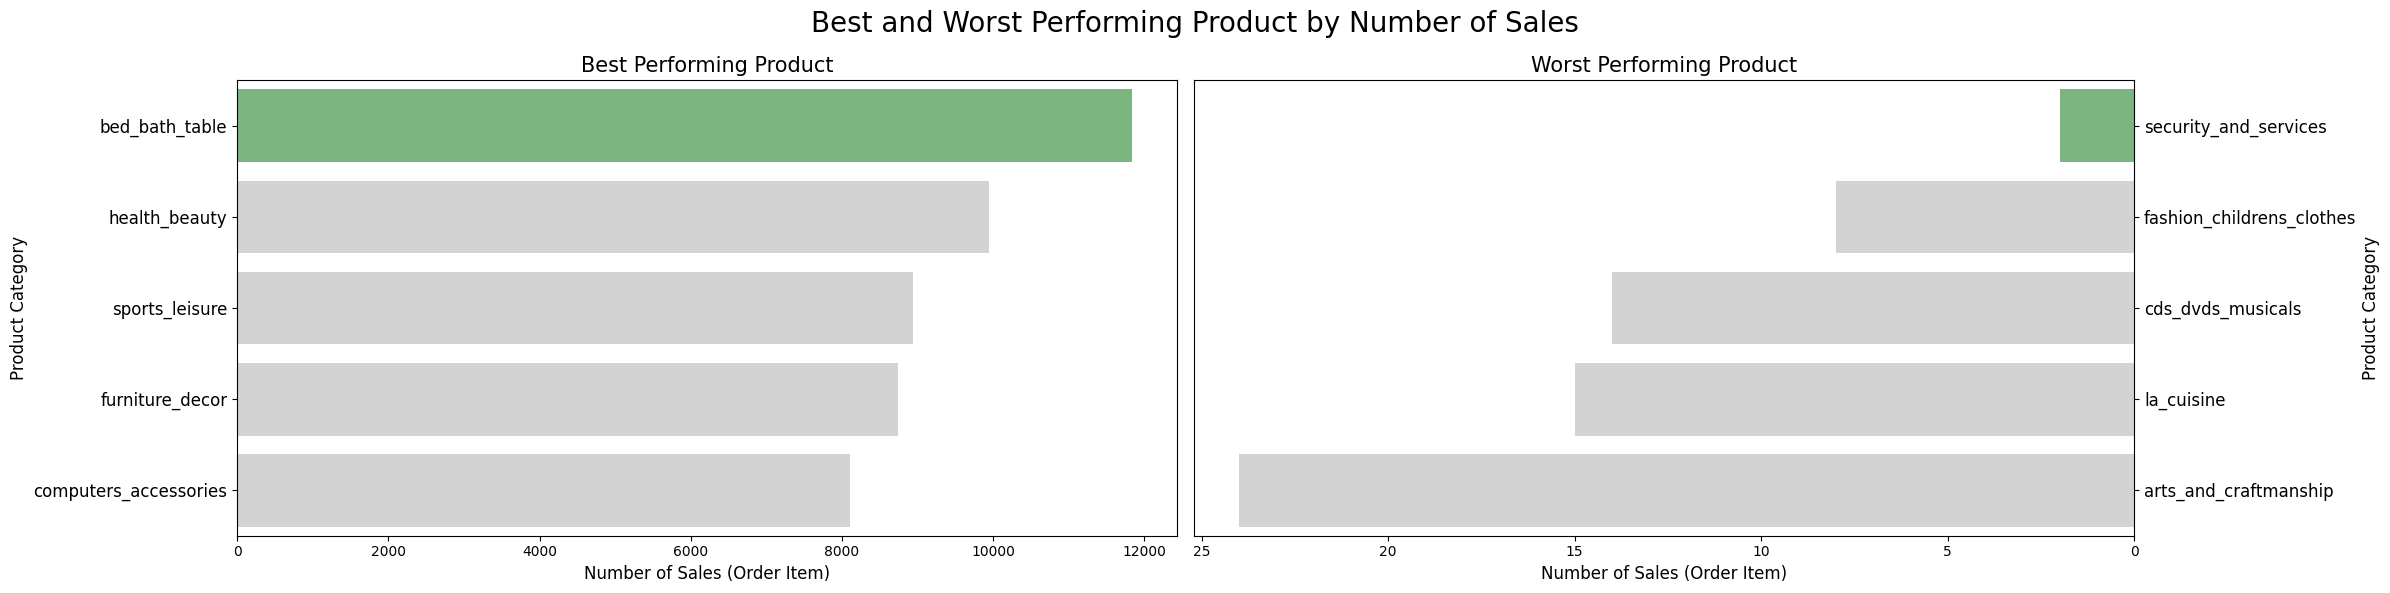

In [97]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BF78", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="order_item_id",
            y="product_category_name_english",
            data=sum_order_items_df.head(5),
            palette=colors,
            ax=ax[0])

ax[0].set_ylabel("Product Category", fontsize=12)
ax[0].set_xlabel("Number of Sales (Order Item)", fontsize=12)
ax[0].set_title("Best Performing Product", loc="center", fontsize=15)
ax[0].tick_params(axis='y', labelsize=12)

sns.barplot(x="order_item_id",
            y="product_category_name_english",
            data=sum_order_items_df.sort_values(by="order_item_id", ascending=True).head(5),
            palette=colors,
            ax=ax[1])

ax[1].set_ylabel("Product Category", fontsize=12)
ax[1].set_xlabel("Number of Sales (Order Item)", fontsize=12)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Best and Worst Performing Product by Number of Sales", fontsize=20)

plt.tight_layout()
plt.show()

**Insight:**
- Berdasarkan bar chart tersebut, bisa dilihat bahwa top 5 produk yang paling banyak terjual adalah produk dengan kategori bed_bath_table, health_beauty, sports_leisure, furniture_decor, dan computers_accessories.
- Kemudian untuk top 5 produk yang paling sedikit terjual adalah produk dengan kategori security_and_services, fashion_childrens_clothes, cds_dvds_musicals, la_cuisine, dan arts_and_craftmanship.

### Pertanyaan 2: Bagaimana performa penjualan dan pendapatan dalam beberapa bulan terakhir?

In [138]:
monthly_orders_df = all_df.resample(rule='M', on='order_purchase_timestamp').agg({
    "order_id": "nunique",
    "payment_value": "sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "payment_value": "revenue"
}, inplace=True)
monthly_orders_df.head()

,order_purchase_timestamp,order_count,revenue
0,2016-09,2,347.52
1,2016-10,301,72775.82
2,2016-11,0,0.00
3,2016-12,1,19.62
4,2017-01,767,184100.75


In [139]:
all_df = all_df.sort_values(by='order_purchase_timestamp')

monthly_performance = all_df.resample('M', on='order_purchase_timestamp').agg({
    "order_id": "nunique",
    "payment_value": "sum"
})

monthly_performance.index = monthly_performance.index.strftime('%B')
monthly_performance = monthly_performance.reset_index()

monthly_performance.rename(columns={
    "order_id": "order_count",
    "payment_value": "total_revenue"
}, inplace=True)

recent_months_performance = monthly_performance.tail(9)

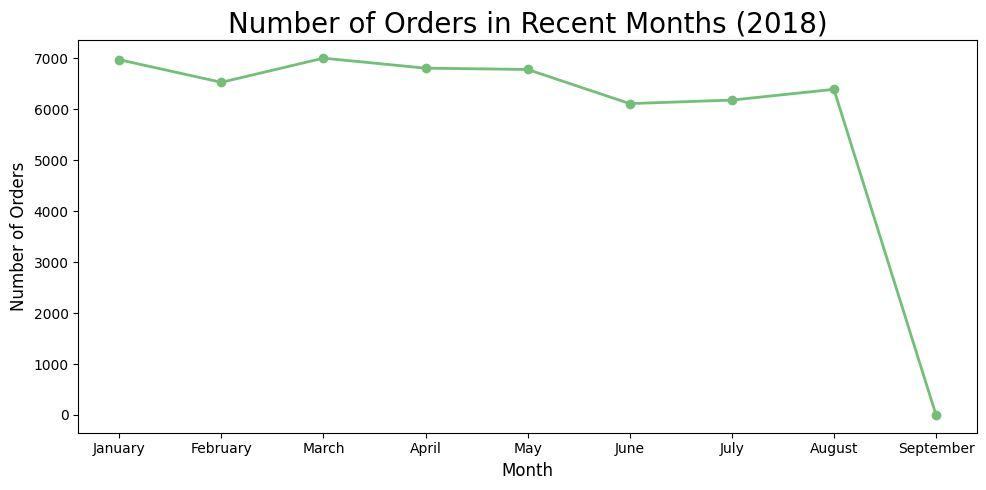

In [140]:
plt.figure(figsize=(10, 5))
plt.plot(recent_months_performance["order_purchase_timestamp"],
         recent_months_performance["order_count"],
         marker='o', color='#72BF78', label='Number of Orders', linewidth=2)

# Menambahkan judul dan label
plt.title('Number of Orders in Recent Months (2018)', loc="center", fontsize=20)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

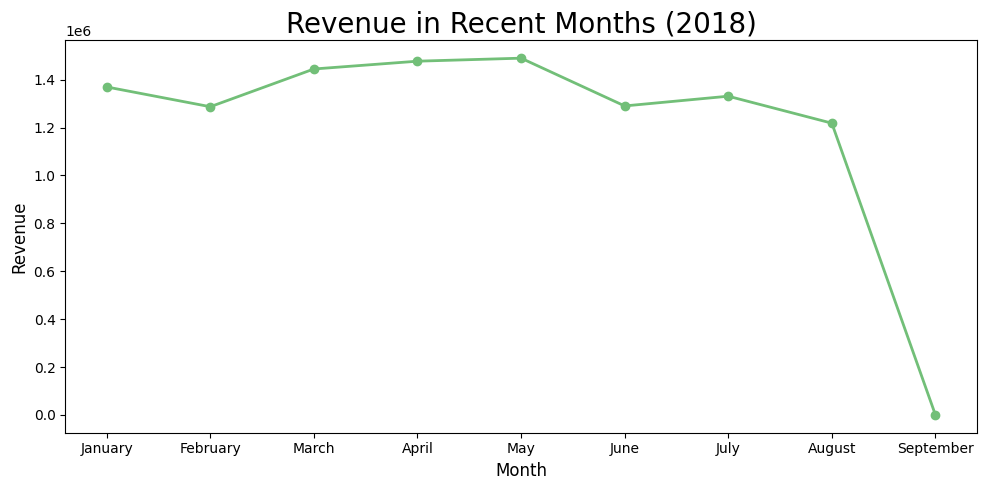

In [141]:
plt.figure(figsize=(10, 5))
plt.plot(recent_months_performance["order_purchase_timestamp"],
         recent_months_performance["total_revenue"],
         marker='o', color='#72BF78', label='Revenue', linewidth=2)

plt.title('Revenue in Recent Months (2018)', loc="center", fontsize=20)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

**Insight:**
- Berdasarkan line chart tersebut, dapat dilihat bahwa performa penjualan pada tahun 2018 naik turun. Dari bulan Januari ke Februari mengalami penurunan. Kemudian dari bulan Februari ke bulan Maret terjadi peningkatan. Selanjutnya dari bulan Maret sampai Mei terjadi sedikit penurunan, lalu dari bulan Mei ke Juni mengalami penurunan yang signifikan. Kemudian mulai meningkat lagi dari bulan Juli sampai Agustus.
- Sama seperti penjualan, performa pendapatan pada tahun 2018 juga naik turun. Mulai dari bulan Januari ke Februari mengalami penurunan. Kemudian dari bulan Februari ke bulan Maret terjadi peningkatan yang signifikan. Selanjutnya dari bulan Maret sampai Mei sedikit ada peningkatan atau stabil, lalu dari bulan Mei ke Juni mengalami penurunan yang signifikan. Kemudian dari bulan Juni ke Juli ada sedikit peningkatan, tetapi turun kembali pada bulan Agustus.

## Analisis Lanjutan (Opsional)

### RFM Analisis

- Recency: parameter yang digunakan untuk melihat kapan terakhir seorang pelanggan melakukan transaksi.
- Frequency: parameter ini digunakan untuk mengidentifikasi seberapa sering seorang pelanggan melakukan transaksi.
- Monetary: parameter terakhir ini digunakan untuk mengidentifikasi seberapa besar revenue yang berasal dari pelanggan tersebut.

In [144]:
rfm_df = all_df.groupby(by="customer_unique_id", as_index=False).agg({
    "order_purchase_timestamp": "max",
    "order_id": "nunique",
    "payment_value": "sum"
})

rfm_df.columns = ["customer_unique_id", "max_order_timestamp", "frequency", "monetary"]

# Menghitung kapan terakhir pelanggan melakukan transaksi (dalam hari)
rfm_df["max_order_timestamp"] = pd.to_datetime(rfm_df["max_order_timestamp"]).dt.date

# Mengambil tanggal terakhir transaksi di dataset untuk menghitung recency
recent_date = all_df["order_purchase_timestamp"].dt.date.max()

# Menghitung recency (perbedaan hari antara transaksi terakhir pelanggan dengan recent_date)
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

# Menghapus kolom 'max_order_timestamp' karena sudah tidak diperlukan
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)

rfm_df.head()

,customer_unique_id,frequency,monetary,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,116
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19,119
2,0000f46a3911fa3c0805444483337064,1,86.22,542
3,0000f6ccb0745a6a4b88665a16c9f078,1,43.62,326
4,0004aac84e0df4da2b147fca70cf8255,1,196.89,293


In [157]:
rfm_df.sort_values(by="frequency", ascending=False)

,customer_unique_id,frequency,monetary,recency
51505,8d50f5eadf50201ccdcedfb9e2ac8455,15,820.15,14
22823,3e43e6105506432c953e165fb2acf44c,9,1963.58,188
73977,ca77025e7201e3b30c44b472ff346268,7,2126.44,94
36755,6469f99c1f9dfae7733b25662e7f1782,7,973.09,67
10077,1b6c7548a2a1f9037c1fd3ddfed95f33,7,1386.54,201
...,...,...,...,...
31578,564ab8ca31faaf89e0ce856cfd7472a6,1,67.96,489
31577,56499d19a0dfa7e0219fe765cfe6f1c6,1,116.94,188
31576,564988508a81dca36512b04a1ce906f9,1,72.43,273
31575,56493fe11c5c9b6159183de0aeaaa971,1,186.12,201


In [158]:
rfm_df.sort_values(by="monetary", ascending=False)

,customer_unique_id,frequency,monetary,recency
3724,0a0a92112bd4c708ca5fde585afaa872,1,109312.64,339
71633,c402f431464c72e27330a67f7b94d4fb,1,44048.00,193
23445,4007669dec559734d6f53e029e360987,1,36489.24,283
87488,ef8d54b3797ea4db1d63f0ced6a906e9,1,30186.00,137
43206,763c8b1c9c68a0229c42c9fc6f662b93,1,29099.52,50
...,...,...,...,...
40725,6f5b9d1cdccc4d28f0483a612edecacf,1,11.63,366
14826,2878e5b88167faab17d4fb83a986d38b,1,11.63,309
65526,b33336f46234b24a613ad9064d13106d,1,10.89,74
69096,bd06ce0e06ad77a7f681f1a4960a3cc6,1,10.07,355


In [159]:
rfm_df.sort_values(by="recency", ascending=True)

,customer_unique_id,frequency,monetary,recency
93070,ff22e30958c13ffe219db7d711e8f564,2,332.92,0
4587,0c6d7218d5f3fa14514fd29865269993,1,178.25,5
64281,afbcfd0b9c5233e7ccc73428526fbb52,1,2486.25,5
1509,0421e7a23f21e5d54efed456aedbc513,1,119.42,5
90520,f80013faf776e37bcea7634d59c2181e,1,74.21,5
...,...,...,...,...
67522,b8b8726af116a5cfb35b0315ecef9172,1,35.61,700
51474,8d3a54507421dbd2ce0a1d58046826e0,1,133.46,700
5373,0eb1ee9dba87f5b36b4613a65074337c,1,109.34,701
26477,4854e9b3feff728c13ee5fc7d1547e92,1,75.06,728


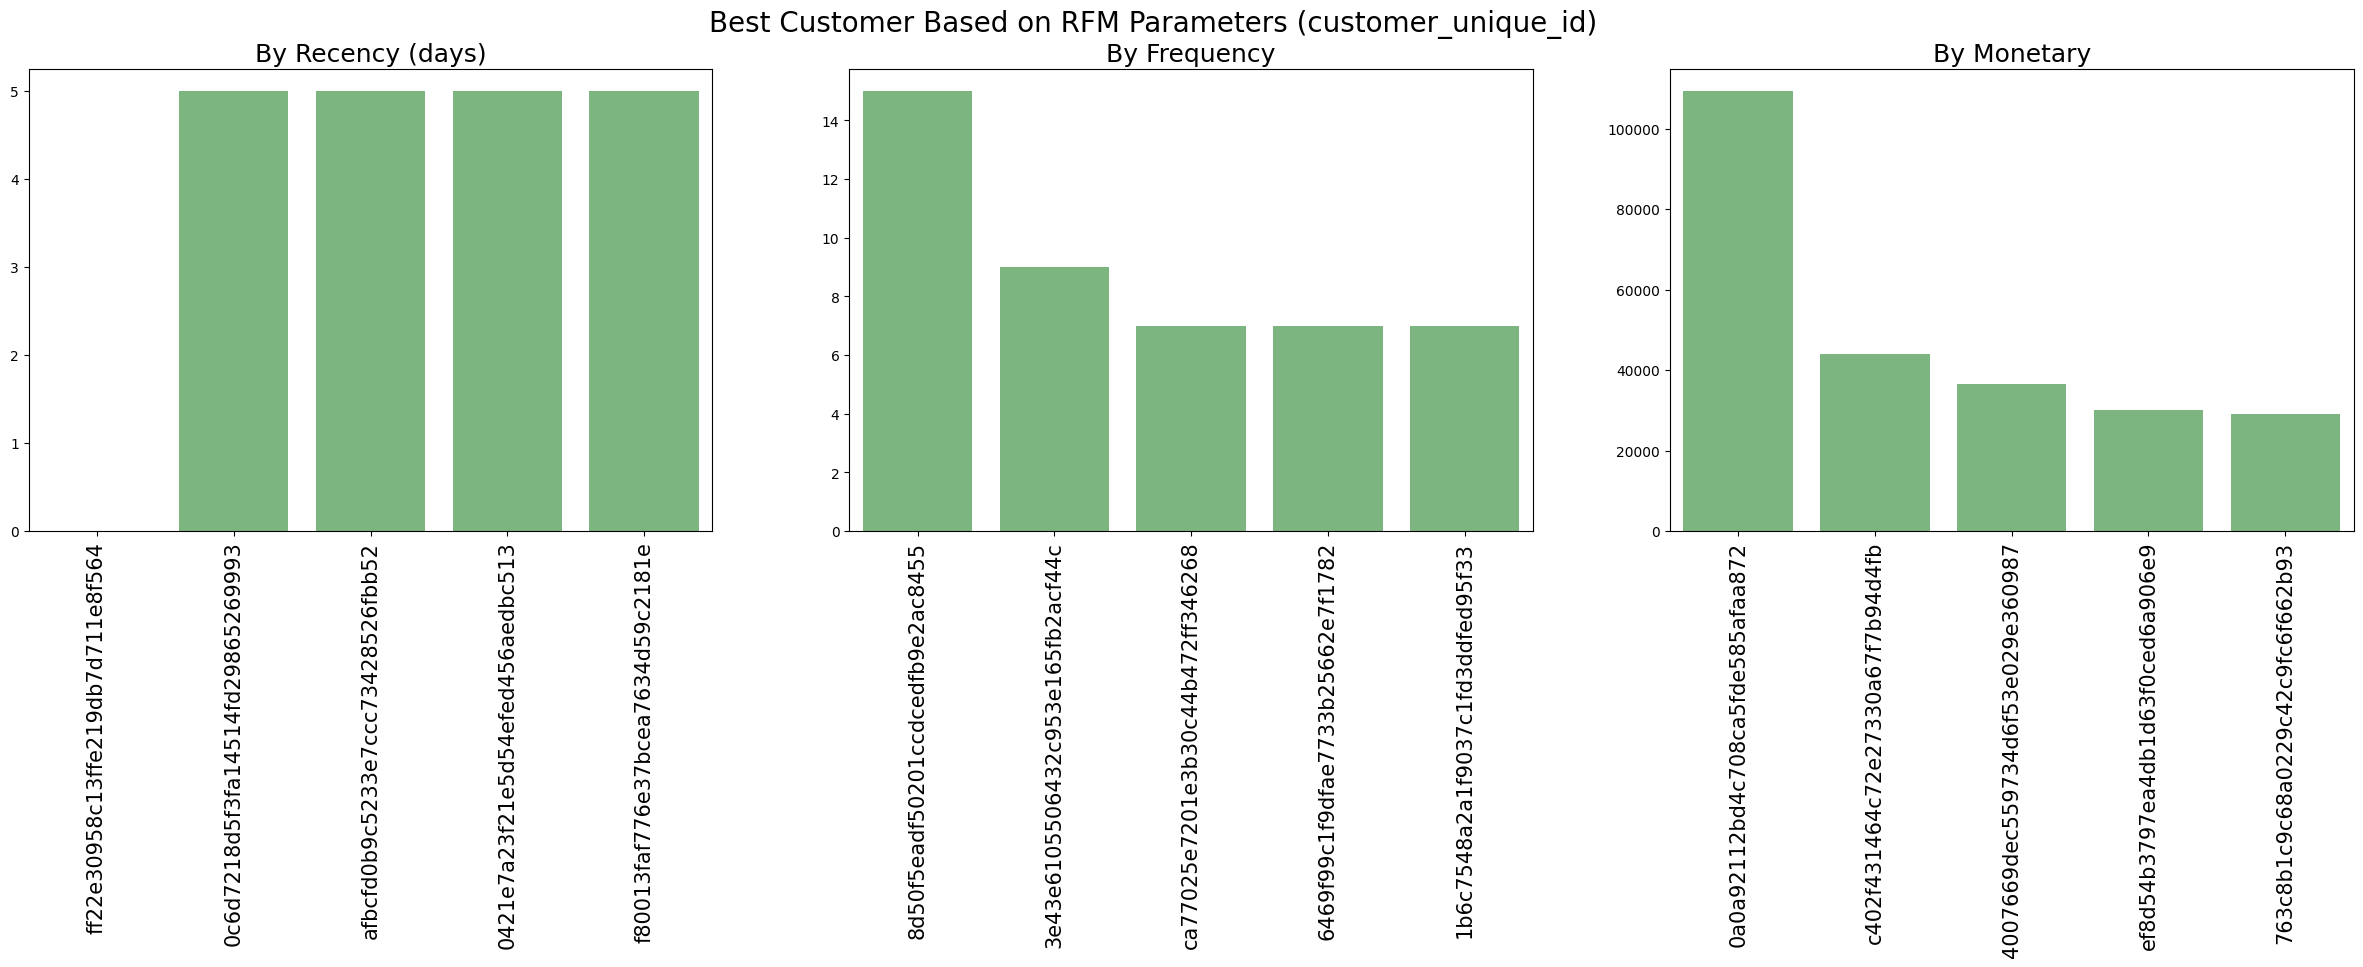

In [156]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BF78", "#72BF78", "#72BF78", "#72BF78", "#72BF78"]

sns.barplot(y="recency", x="customer_unique_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)
plt.setp(ax[0].get_xticklabels(), rotation=90)

sns.barplot(y="frequency", x="customer_unique_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)
plt.setp(ax[1].get_xticklabels(), rotation=90)

sns.barplot(y="monetary", x="customer_unique_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)
plt.setp(ax[2].get_xticklabels(), rotation=90)

plt.suptitle("Best Customer Based on RFM Parameters (customer_unique_id)", fontsize=20)
plt.show()

### Geospatial Analysis

In [160]:
geolocation_state = geolocation_df.groupby(['geolocation_zip_code_prefix'])['geolocation_state'].nunique().reset_index(name='count')
geolocation_state[geolocation_state['count']>= 2].shape
max_state = geolocation_df.groupby(['geolocation_zip_code_prefix','geolocation_state']).size().reset_index(name='count').drop_duplicates(subset = 'geolocation_zip_code_prefix').drop('count',axis=1)

In [161]:
geolocation_spatial = geolocation_df.groupby(['geolocation_zip_code_prefix','geolocation_city','geolocation_state'])[['geolocation_lat','geolocation_lng']].median().reset_index()
geolocation_spatial = geolocation_spatial.merge(max_state,on=['geolocation_zip_code_prefix','geolocation_state'],how='inner')

In [162]:
customers_geo_spat = customer_df.merge(geolocation_spatial,left_on='customer_zip_code_prefix',right_on='geolocation_zip_code_prefix',how='inner')

In [163]:
customers_geo_spat.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,geolocation_zip_code_prefix,geolocation_city,geolocation_state,geolocation_lat,geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active,14409,franca,SP,-20.502307,-47.396740
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Active,9790,sao bernardo do campo,SP,-23.731211,-46.541206
2,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Active,9790,são bernardo do campo,SP,-23.727018,-46.543192
3,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Active,1151,sao paulo,SP,-23.531294,-46.657039
4,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Active,1151,são paulo,SP,-23.531294,-46.656866


In [164]:
customers_geo_spat.to_csv("geolocation.csv", index=False)

In [167]:
def plot_brazil_map(data):
    brazil = mpimg.imread(urllib.request.urlopen('https://i.pinimg.com/originals/3a/0c/e1/3a0ce18b3c842748c255bc0aa445ad41.jpg'),'jpg')
    ax = data.plot(kind="scatter", x="geolocation_lng", y="geolocation_lat", figsize=(10,10), alpha=0.3,s=0.3,c='maroon')
    plt.axis('off')
    plt.imshow(brazil, extent=[-73.98283055, -33.8,-33.75116944,5.4])
    plt.show()

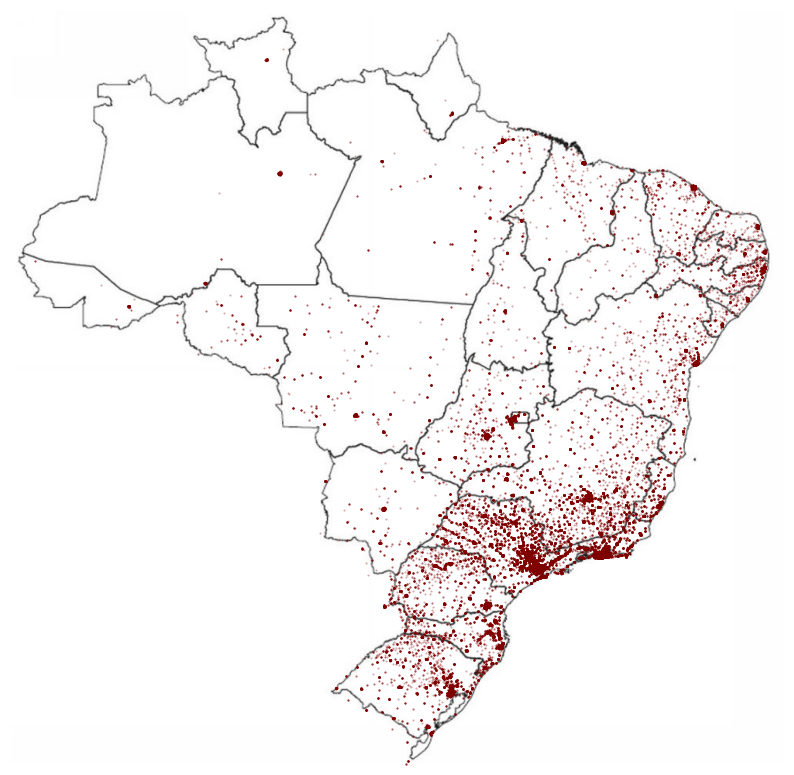

In [168]:
plot_brazil_map(customers_geo_spat.drop_duplicates(subset='customer_unique_id'))

## Conclusion

- Produk yang paling banyak terjual adalah produk dengan kategori bed_bath_table, health_beauty, sports_leisure, furniture_decor, dan computers_accessories, sedangkan produk yang paling sedikit terjual adalah produk dengan kategori security_and_services, fashion_childrens_clothes, cds_dvds_musicals, la_cuisine, dan arts_and_craftmanship.
- Performa penjualan pada tahun 2018 naik turun. Dari bulan Januari ke Februari mengalami penurunan. Kemudian dari bulan Februari ke bulan Maret terjadi peningkatan. Selanjutnya dari bulan Maret sampai Mei terjadi sedikit penurunan, lalu dari bulan Mei ke Juni mengalami penurunan yang signifikan. Kemudian mulai meningkat lagi dari bulan Juli sampai Agustus.
Sama seperti penjualan.
- Performa pendapatan pada tahun 2018 juga naik turun. Mulai dari bulan Januari ke Februari mengalami penurunan. Kemudian dari bulan Februari ke bulan Maret terjadi peningkatan yang signifikan. Selanjutnya dari bulan Maret sampai Mei sedikit ada peningkatan atau stabil, lalu dari bulan Mei ke Juni mengalami penurunan yang signifikan. Kemudian dari bulan Juni ke Juli ada sedikit peningkatan, tetapi turun kembali pada bulan Agustus.
- Terakhir kali pelanggan melakukan pembelian adalah ada yang hari ini (0 hari), 5 hari yang lalu, dan yang paling lama adalah 729 hari yang lalu.
- Total transaksi yang dilakukan pelanggan paling banyak adalah 15 kali dan yang paling sedikit 1 kali.
- Total pengeluaran pelanggan paling banyak adalah 109312.64 dan paling sedikit 9.59.
- Negara bagian yang memiliki banyak pelanggan adalah SP dan kota yang memiliki banyak pelanggan adalah Sao Paulo.